In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sb 
import matplotlib.pyplot as plt
import sklearn 

from pandas import Series,DataFrame
from pylab import rcParams
from sklearn import preprocessing 

In [2]:
%matplotlib inline
rcParams['figure.figsize']=5,4
sb.set_style('whitegrid')

In [4]:
# data upload
address="C:\\Users\\saI\\Desktop\\DATA\\titanic-training-data.csv"

titanic_training = pd.read_csv(address)

titanic_training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_training.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [14]:
titanic_training.columns

# Varibale discription 
# PassengerId = 
# Survived = survival( 0=No, 1=yes)    this our target variable 
# Pclass   = passenger class ( 1=1st,2=2nd and so on )
# Name     = name
# Sex      = sex
# Age      = age
# SibSp    = number of sibling/spouses abroad
# Parch    = number of parents/children abroad
# Ticket   = ticket number
# Fare     = passenger fare (british pound)
# Cabin    = cabin
# Embarked  = port of embarkation ( C= Cherbourg,France,Q=queenston,UK, S=southampton,cobh,ireland)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
titanic_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
titanic_training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
# checking null values in dataset
titanic_training.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
# Taking care of missing values
# dropping few irrevalent columns 
titanic_data = titanic_training.drop(['Name','Ticket','Cabin'],axis=1)
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


C:\Users\saI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

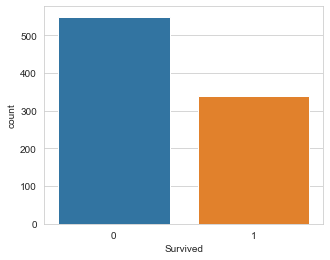

In [50]:
sb.countplot(titanic_data['Survived'])


In [58]:
titanic_data['Parch'].value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<AxesSubplot:xlabel='Parch', ylabel='Age'>

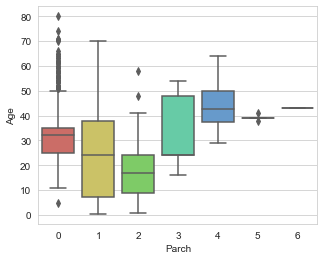

In [61]:
# boxplot 
sb.boxplot(x='Parch',y='Age',data=titanic_data,palette='hls')

In [20]:
# using groupby fn  grouping data by parch
Parch_groups = titanic_data.groupby(titanic_data['Parch'])
Parch_groups.mean()


,PassengerId,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774
1,465.110169,0.550847,2.203390,24.422000,1.084746,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


In [21]:
# imputing missing age values with age mean values 

def age_approx(cols):
    Age   = cols[0]
    Parch = cols[1]
    
    if pd.isnull(Age):
        if Parch == 0:
            return 32 
        elif Parch == 1:
            return 24
        elif Parch == 2:
            return 17
        elif Parch == 3:
            return 33
        elif Parch == 4:
            return 45
        else:
            return 30 # those who are not in this category assign avg age to those 
    else:
        return Age # if age is not null than assign actual Age varible 

In [22]:
# apply above return function to age 
titanic_data['Age'] = titanic_data[['Age','Parch']].apply(age_approx, axis=1)
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [23]:
# since we only have 2 null value for embarked so drop these two data 
titanic_data.dropna(inplace =True)                # dropping rows containg null values 
titanic_data.reset_index(inplace=True,drop=True)  # reseting index after dropping 

titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.6+ KB


In [24]:
# importing Ml libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score

In [25]:
# Converting categorical varibale into dummy indicators 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
gender_cat = titanic_data['Sex']
gender_encoded = label_encoder.fit_transform(gender_cat)
gender_encoded[0:5]

array([1, 0, 0, 0, 1])

In [26]:
# now to check what code is encoded is for male & female 
titanic_data.head()     # 1- male /0 - female 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [27]:
# creating gender DataFrame 

gender_df = pd.DataFrame(gender_encoded,columns=['male_gender'])
gender_df.head()

# 1 -male / 0- female 

,male_gender
0,1
1,0
2,0
3,0
4,1


In [28]:
# embarked data dummy indicator   it gives multi -nominal categorical variable 
embarked_cat = titanic_data['Embarked']
embarked_encoded = label_encoder.fit_transform(embarked_cat)
embarked_encoded[0:100]

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2])

In [29]:
# one-hot encoded for binary output 
from sklearn.preprocessing import OneHotEncoder
binary_encoder =  OneHotEncoder(categories='auto')

embarked_1hot = binary_encoder.fit_transform(embarked_encoded.reshape(-1,1))
embarked_1hot_mat = embarked_1hot.toarray()
embarked_df = pd.DataFrame(embarked_1hot_mat, columns=['C','S','Q'])
embarked_df.head()


,C,S,Q
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [30]:
titanic_data.drop(['Sex','Embarked'],axis=1,inplace=True)
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [31]:
# creating titnaic dummy variable 
titanic_dmy = pd.concat([titanic_data,gender_df,embarked_df],axis=1,verify_integrity=True).astype(float)
titanic_dmy[0:5]


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male_gender,C,S,Q
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,1.0


<AxesSubplot:>

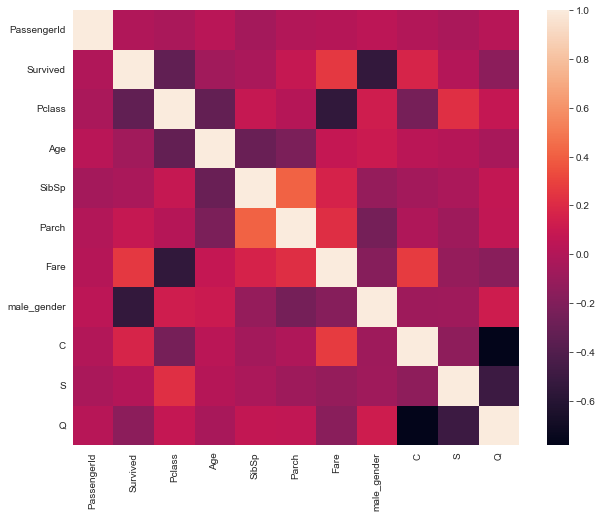

In [33]:
# checking independence of features using features method 
# one with -1 and +1 value are strongly dependent or correlated so we have to drop those features 
plt.figure(figsize=(10,8))
sb.heatmap(titanic_dmy.corr())

In [34]:
titanic_dmy.drop(['Fare','Pclass'],axis=1,inplace = True)

In [35]:
titanic_dmy.head()

,PassengerId,Survived,Age,SibSp,Parch,male_gender,C,S,Q
0,1.0,0.0,22.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,38.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3.0,1.0,26.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5.0,0.0,35.0,0.0,0.0,1.0,0.0,0.0,1.0


In [36]:
# checking that data size is sufficient  [ rule of thumb= at least 50 record per predictive feature ]
titanic_dmy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    float64
 1   Survived     889 non-null    float64
 2   Age          889 non-null    float64
 3   SibSp        889 non-null    float64
 4   Parch        889 non-null    float64
 5   male_gender  889 non-null    float64
 6   C            889 non-null    float64
 7   S            889 non-null    float64
 8   Q            889 non-null    float64
dtypes: float64(9)
memory usage: 62.6 KB


In [37]:
# break data into training and test set
# separtaing features & target    implimenting test size etc 
X_train,X_test,Y_train,Y_test = train_test_split(titanic_dmy.drop('Survived',axis=1),
                                                 titanic_dmy['Survived'],test_size =0.2, random_state=200)

In [38]:
# Check how data has splilitted 
print(titanic_dmy.shape,X_train.shape,X_test.shape)

(889, 9) (711, 8) (178, 8)


In [39]:
# Deploying & evaluating the model 
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train,Y_train)

LogisticRegression(solver='liblinear')

In [40]:
Y_pred = LogReg.predict(X_test)

In [41]:
# Model Evalution
# 1. Classification report without cross validation 
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       109
         1.0       0.79      0.71      0.75        69

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



In [42]:
# 2. K-fold cross-validation & confusion matrices 
Y_train_pred = cross_val_predict(LogReg,X_train,Y_train,cv=5)
confusion_matrix(Y_train,Y_train_pred)

array([[377,  63],
       [ 91, 180]], dtype=int64)

In [43]:
# above matrics is telling that 377 and 180 are correct prediction while 91 & 63 are incorrect prediction 

precision_score(Y_train,Y_train_pred)  # give precision score 

0.7407407407407407

In [44]:
# Test Prediction for index position = 850
titanic_dmy[850:851]

,PassengerId,Survived,Age,SibSp,Parch,male_gender,C,S,Q
850,853.0,0.0,9.0,1.0,1.0,0.0,1.0,0.0,0.0


In [45]:
test_passenger = np.array([866,40,0,0,0,0,0,1]).reshape(1,-1)

print(LogReg.predict(test_passenger))
print(LogReg.predict_proba(test_passenger)) # below result show  id =866 and age =40 person will survived and probability this theory correct  is 73%

# these two person are identical same except the age data age 42 and test_person age is 40 

[1.]
[[0.26351831 0.73648169]]


C:\Users\saI\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\saI\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
